In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('/home/vinod/Downloads/Twitter_Data.csv')
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [4]:
data.isna().sum()

clean_text    4
category      7
dtype: int64

In [5]:
data.dropna(inplace=True)

<AxesSubplot:>

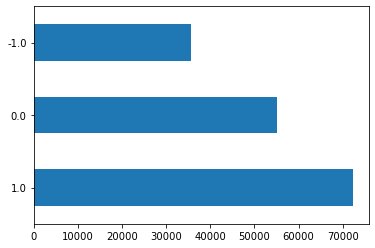

In [6]:
data['category'].value_counts().plot(kind='barh')

In [7]:
data.isna().sum()

clean_text    0
category      0
dtype: int64

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/vinod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
port_set=PorterStemmer()
def steamming(clean_text):
    stemmed_content=re.sub('[^a-zA-Z]',' ',clean_text)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_set.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [11]:
data['clean_text']=data['clean_text'].apply(steamming)

In [12]:
data.head()

,clean_text,category
0,modi promis minimum govern maximum govern expe...,-1.0
1,talk nonsens continu drama vote modi,0.0
2,say vote modi welcom bjp told rahul main campa...,1.0
3,ask support prefix chowkidar name modi great s...,1.0
4,answer among power world leader today trump pu...,1.0


In [13]:
data['category']=data['category'].astype('int')

In [14]:
data.dtypes

clean_text    object
category       int64
dtype: object

In [15]:
X=data['clean_text'].values
y=data['category'].values

In [16]:
vector=TfidfVectorizer()
vector.fit(X)
X=vector.transform(X)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=102)

In [18]:
model=LogisticRegression()
model.fit(X_train,y_train)

/home/vinod/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
prediction=model.predict(X_test)
prediction

array([ 1, -1,  1, ...,  0, -1,  1])

In [20]:
print('The accuracy_score test score is {}'.format(model.score(X_test,y_test)))

The accuracy_score test score is 0.8392116437179393


In [21]:
print('The accuracy_score test score is {}'.format(model.score(X_train,y_train)))

The accuracy_score test score is 0.8692422234221852


In [22]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV